In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Reddit").getOrCreate()

#spark = SparkSession.builder.appName("HackerNews").getOrCreate()

df = None
df = spark.read.csv("s3a://andrew-bierbaum-insight-test-dataset/Reddit/Reddit_Comments_2006*csv.gz", header=True,multiLine=True, escape='"')

print(df.show(10))

+--------------------+------------+--------+----+---------------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|                body|score_hidden|archived|name|         author|author_flair_text|downs|created_utc|subreddit_id|link_id|parent_id|score|retrieved_on|controversiality|gilded|   id| subreddit|ups|distinguished|author_flair_css_class|
+--------------------+------------+--------+----+---------------+-----------------+-----+-----------+------------+-------+---------+-----+------------+----------------+------+-----+----------+---+-------------+----------------------+
|Guess this kinda ...|        null|    null|null|        dbenhur|             null| null| 1152221185|        t5_6|  t3_87|    t3_87|   35|  1473826345|               0|     0|c9gm2|reddit.com| 35|         null|                  null|
|           [deleted]|        null|    null|null|      [deleted]

In [2]:
df.createOrReplaceTempView("Reddit")
#time >1000000000 just filters out 6 bad entries --double chedk this is a good way to do it
results = spark.sql("SELECT created_utc, body FROM Reddit WHERE body LIKE '% python %'  SORT BY created_utc ASC")
#AND time >1000000000
results.show()

+-----------+--------------------+
|created_utc|                body|
+-----------+--------------------+
| 1136349843|will it always be...|
| 1136984124|I was going to le...|
| 1137072318|eclipse and pydev...|
| 1137155102|I love python but...|
| 1137155352|Ruby until *very*...|
| 1137285773|Software as art p...|
| 1137310029|i tried this a wh...|
| 1139381304|Maybe. But python...|
| 1139385681|Lisp macros aren'...|
| 1139397565|I don't think pyt...|
| 1139411795|Unfortunately, la...|
| 1139803996|Why should I choo...|
| 1139846677|This article just...|
| 1139870381|and for those tha...|
| 1140133049|Cellphones are co...|
| 1140447809|I've implemented ...|
| 1141002031|Well Only Ruby pe...|
| 1141007849|a *lot*. i use li...|
| 1141008255|i haven't used ru...|
| 1141067291|I've never worked...|
+-----------+--------------------+
only showing top 20 rows



In [3]:
from datetime import datetime
python_results = results.select('created_utc').collect()
#python_results_timestamp = results.select('timestamp').collect()
clean_python_results = [datetime.fromtimestamp(float(i[0])) for i in python_results]
#print(clean_python_results_timestamp)

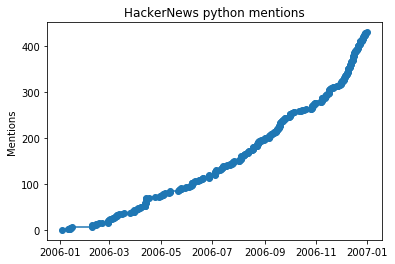

<Figure size 432x288 with 0 Axes>

In [4]:
%matplotlib inline
import numpy
import matplotlib
import matplotlib.pyplot as plt
count = numpy.arange(len(clean_python_results))
#Date_Data = matplotlib.dates.datestr2num(clean_python_results_utc)
Date_Data = clean_python_results
matplotlib.pyplot.plot_date(Date_Data,count,xdate=True, drawstyle = 'steps-pre', linestyle = 'solid' )
matplotlib.pyplot.ylabel('Mentions')
matplotlib.pyplot.title('HackerNews python mentions')
plt.show()
plt.savefig('Reddit.png')
